In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

mnist= tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images/255, test_images/255

# for i in range(6):
#   plt.subplot(2,3,i+1)
#   plt.imshow(train_images[i],cmap='gray')
# plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
model=tf.keras.models.Sequential()

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(1000,activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=10
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2038 - accuracy: 0.9392
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0794 - accuracy: 0.9757
Epoch 3/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0518 - accuracy: 0.9840
Epoch 4/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0337 - accuracy: 0.9891
Epoch 5/10
938/938 [==============================] - 11s 11ms/step - loss: 0.0243 - accuracy: 0.9922
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 7/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0142 - accuracy: 0.9952
Epoch 8/10
938/938 [==============================] - 12s 12ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 9/10
938/938 [==============================] - 11s 12ms/step - loss: 0.0111 - accuracy: 0.9963
Epoch 10/10
938/938 [==============================] - 11s 12ms/step - loss: 0.010

In [ ]:
model.evaluate(test_images,test_labels,batch_size=batchSize)



157/157 [==============================] - 0s 2ms/step - loss: 0.1138 - accuracy: 0.9666


[0.11384798586368561, 0.9666000008583069]

Prediction :  4


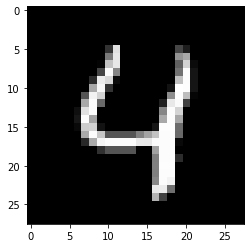

In [ ]:
import numpy as np

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(layers.Softmax())


cnt =4

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",label0)
